In [1]:
# Copyright 2018 Esref Ozdemir
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Match Visualization
In this notebook, we visualize player data by animating the players using matplotlib.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib
from IPython import display
from itertools import count
import matplotlib.lines as mlines
import os

from utils import remove_missing_raw_rows

In [8]:
#freekick
mid = 20157
#
#mid = 20183

raw_df = pd.read_csv('../data/processed/{}_raw.csv'.format(mid))

try:
    event_df = pd.read_csv('../data/event/{}_event.csv'.format(mid))
    hasball_df = pd.read_csv('../data/hasball/{}_hasball.csv'.format(mid))
except FileNotFoundError:
    event_df = None
    hasball_df = None

event_names = pd.read_csv('../doc/event_definitions_en.csv')
event_names = pd.Series(data=event_names['NAME'].values, index=event_names['ID'].values)
max_name_len = max(len(name) for _, name in event_names.iteritems())

In [9]:
event_counts = np.zeros(4)
event_file_list = os.listdir('../data/event')
for filename in event_file_list:
    df = pd.read_csv('../data/event/{}'.format(filename))
    

In [10]:
event_df[event_df['eventId'] == 93]

,teamId,eventId,jersey,half,minute,second,location,bodyPart,postLocation,custom
1212,1,93,4,2,75,55,-1,-1,-1,0
1213,2,93,6,2,75,58,-1,-1,-1,1


## Visualization

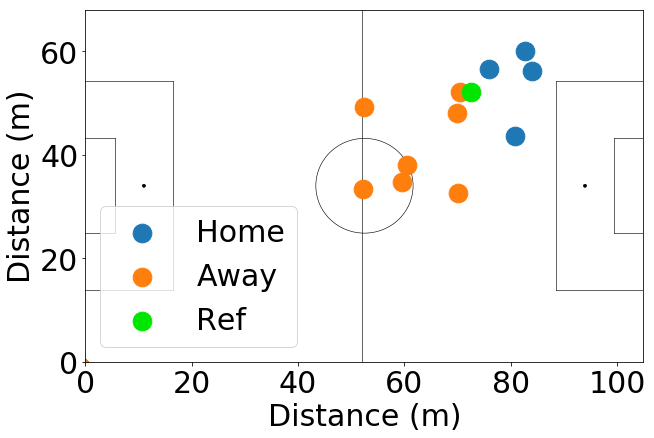

KeyboardInterrupt: 

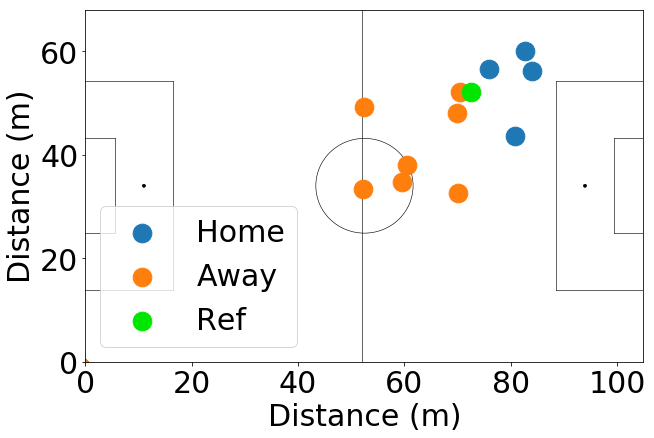

In [11]:
%matplotlib inline

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

# freekick
# 20157
#out_file = 'freekick_visualization.pdf'
#h, m, s = 2, 91, 5  # (half, minute, second)

# corner
# 20157
#out_file = 'corner_visualization.pdf'
#h, m, s = 2, 47, 0 # (half, minute, second)

# goal
# 20157
#out_file = 'goal_visualization.pdf'
h, m, s = 2, 78, 10 # (half, minute, second)

# penalty
# 20157
#h, m, s = 2, 77, 59 # (half, minute, second)
#out_file = 'penalty_visualization.pdf'
width, height = 105, 68

plt.figure(figsize=(10, 10*height/width))


for i in count():
    beg_sec = 60*m + s
    tot_sec = beg_sec + i
    minute = tot_sec//60
    second = tot_sec%60
    
    event_name = 'No Event'
    if hasball_df is not None:
        hasball = hasball_df[
            (hasball_df['half'] == h) &
            (hasball_df['minute'] == minute) &
            (hasball_df['second'] == second)]
        teamPoss = hasball['teamPoss'].iloc[0]
        if teamPoss == 1:
            event_name = 'Home Possession'
        elif teamPoss == 0:
            event_name = 'Away Possession'
        elif event_df is not None:
            event = event_df[
                (event_df['half'] == h) &
                (event_df['minute'] == minute) &
                (event_df['second'] == second)]
            event_name = event_names[event['eventId'].iloc[0]] if not event.empty \
                                                               else 'Game Stop'

    
    sec = raw_df[
        (raw_df['half'] == h) &
        (raw_df['minute'] == minute) &
        (raw_df['second'] == second)]
    home = sec[sec['teamType'] == 1][['x', 'y']].values
    away = sec[sec['teamType'] == 2][['x', 'y']].values
    ref = sec[sec['teamType'] == 3][['x', 'y']].values
    
    plt.xlim([0, width])
    plt.ylim([0, height])
    plt.xlabel('Distance (m)')
    plt.ylabel('Distance (m)')
    
    size = 350
    ax = plt.gca()
    mid_circ = plt.Circle((52.5, 34), 9.15, color='black', fill=False, linewidth=0.6, zorder=1)
    left_pen_circ = plt.Circle((11, 34), 0.3, color='black', fill=True, linewidth=0.6, zorder=1)
    right_pen_circ = plt.Circle((94, 34), 0.3, color='black', fill=True, linewidth=0.6, zorder=1)
    # middle line
    ax.add_line(mlines.Line2D((52, 52), (0, 68), color='black', linewidth=0.6, zorder=1))
    # circles
    ax.add_artist(mid_circ)
    ax.add_artist(left_pen_circ)
    ax.add_artist(right_pen_circ)
    
    # left part
    ax.add_line(mlines.Line2D((0, 16.5), (13.84, 13.84), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((0, 16.5), (54.16, 54.16), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((16.5, 16.5), (13.84, 54.16), color='black', linewidth=0.6, zorder=1))
    
    ax.add_line(mlines.Line2D((0, 5.5), (24.84, 24.84), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((0, 5.5), (43.16, 43.16), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((5.5, 5.5), (24.84, 43.16), color='black', linewidth=0.6, zorder=1))
    
    # right part
    ax.add_line(mlines.Line2D((88.5, 105), (13.84, 13.84), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((88.5, 105), (54.16, 54.16), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((88.5, 88.5), (13.84, 54.16), color='black', linewidth=0.6, zorder=1))
    
    ax.add_line(mlines.Line2D((99.5, 105), (24.84, 24.84), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((99.5, 105), (43.16, 43.16), color='black', linewidth=0.6, zorder=1))
    ax.add_line(mlines.Line2D((99.5, 99.5), (24.84, 43.16), color='black', linewidth=0.6, zorder=1))
    
    
    plt.scatter(*home.T, label='Home', s=size, zorder=2)
    plt.scatter(*away.T, label='Away', s=size, zorder=2)
    plt.scatter(*ref.T, label='Ref', c=[[0, 0.9, 0]], s=size, zorder=2)

    plt.legend(loc=3) # lower left
    #plt.legend(loc=4) # lower right
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    time.sleep(0.3)
    plt.gcf().clear()
    
    #plt.savefig(out_file, format='pdf', bbox_inches='tight');
    #break